In [213]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import pandas as pd 

from skimage import io, color, filters, morphology, measure
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans

import scipy
from scipy import ndimage

from skimage import measure, color, io
import imutils
from PIL import Image
from src.helper_functions import change_color

In [251]:
img = cv2.imread('data/small.png')
rows, cols, bands = img.shape
X = img.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

292
330
3


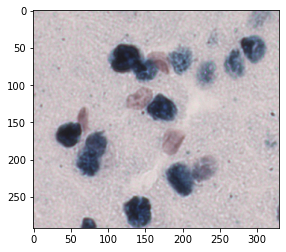

In [252]:
plt.imshow(img)

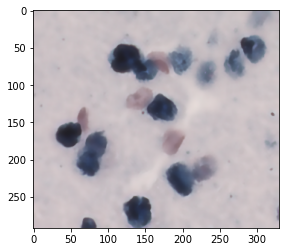

In [253]:
blur = cv2.bilateralFilter(img, 10,75,75)
plt.imshow(blur)

In [254]:
#hue, saturation, value
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

https://scipy-lectures.org/packages/scikit-image/index.html
check this out might have solution to the blob issue (watershed segmentation and/or random walker segmentation) 

In [255]:
ret1, thresh = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY_INV)

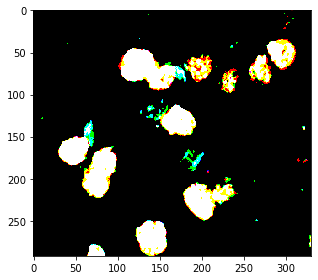

In [256]:
#threshold
io.imshow(thresh)

In [257]:
#remove more noise
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

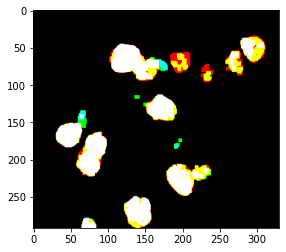

In [258]:
plt.imshow(opening)

In [259]:
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

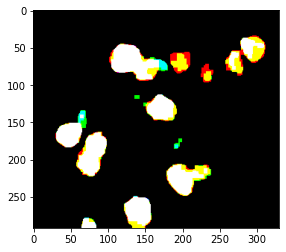

In [260]:
plt.imshow(closing)

In [261]:
kernel = np.ones((4,4), np.uint8)
dilation = cv2.dilate(closing, kernel, iterations=3)

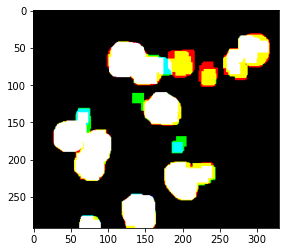

In [262]:
plt.imshow(dilation)

In [263]:
ret2, thresh2 = cv2.threshold(dilation, 0, 255, cv2.THRESH_BINARY_INV)

In [264]:
#change colors
im1 = change_color(thresh2, 'blue', 'black')
im2 = change_color(im1, 'cyan', 'black')
im3 = change_color(im2, 'yellow', 'black')
im4 = change_color(im3, 'green', 'black')
im5 = change_color(im4, 'red', 'fushia')


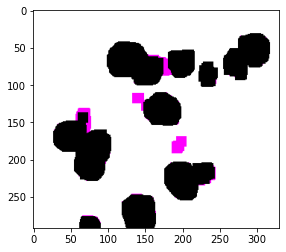

In [265]:
plt.imshow(im5)

In [266]:
rows, cols, bands = opening.shape
X = im5.reshape(rows*cols, bands)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))
    
#[255,0,255] fushia
#[255, 0, 0] red
# [0, 0, 255] blue
# [0, 255, 255] cyan
# [255, 255, 0] yellow

Color: [0. 0. 0.]  >>  Objects: 9
Color: [255. 255. 255.]  >>  Objects: 1
Color: [255.   0. 255.]  >>  Objects: 4


In [267]:
counts = pd.read_csv('data/manual_cell_counts.csv')